
---

**Name & Surname:** Muhittin AKIN

**Student ID:** 1821221006


---



**Name & Surname:** Dilara ÇELİK

**Student ID:** 2021221042


---

**Name & Surname:** Metin KAĞIT

**Student ID:** 1821221033


---



# **Introduction**

In this project, we use entry records from a residential complex to predict visit reason which is order or guest. We analyze relationships between features such as entry time and date, the block and apartment visited, and the individual visitor.

To compare classification methods, we train six different models—Logistic Regression, K-Nearest Neighbors, SVM, Decision Trees, Random Forest, and XGBoost. For each model, we perform hyperparameter tuning with five-fold cross-validation (5-CV) to find the best parameter settings. Finally, we evaluate their performance on a held-out test set using accuracy, precision, recall, F1-score, and AUC.



---


## **Data collection and Preprocessing**

We collect the data from securty checkpoint of residential complex. And anonamize it to privicy. The dataset has 40367 rows and 7 columns. The columns name are:

* **NO:** Id.

* **TARİH:** Visit date.

* **ZİYARET EDİLEN:** Visited person block and apartmen no.

* **TEYİT BİLGİSİ:** Emty Column

* **ZİYARET SEBEBİ:** Visit reason

* **GELİŞ SAATİ:** Visit Time
  
* **ÇIKIŞ SAATİ:** Empty Colum


In [52]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:

df = pd.read_csv('/content/dataMining_DataSet.csv', delimiter=';')

In [3]:
df.head()

,NO,TARİH,ZİYARET EDİLEN,TEYİT BİLGİSİ,ZİYARET SEBEBİ,GELİŞ SAATİ,ÇIKIŞ SAATİ
0,1,01.01.2024,A-146,NaN,YEMEKSEPETİ,09:43:00,NaN
1,2,01.01.2024,B-39,NaN,YEMEKSEPETİ,10:26:00,NaN
2,3,01.01.2024,B-34,NaN,MİSAFİR,10:53:00,NaN
3,4,01.01.2024,B-23,NaN,YEMEKSEPETİ,11:43:00,NaN
4,5,01.01.2024,B111,NaN,TRENDYOL,11:50:00,NaN


In [4]:
print("(Row, Column):", df.shape)
print("(Axes):", df.ndim)
print("Length:",len(df))

(Row, Column): (40367, 7)
(Axes): 2
Length: 40367


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40367 entries, 0 to 40366
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NO               40319 non-null  object
 1   TARİH            40367 non-null  object
 2   ZİYARET EDİLEN   29388 non-null  object
 3   TEYİT BİLGİSİ    3 non-null      object
 4   ZİYARET SEBEBİ   29394 non-null  object
 5   GELİŞ SAATİ      29412 non-null  object
 6   ÇIKIŞ SAATİ      9 non-null      object
dtypes: object(7)
memory usage: 2.2+ MB


In [6]:
df.columns

Index(['NO', 'TARİH', 'ZİYARET EDİLEN ', 'TEYİT BİLGİSİ', 'ZİYARET SEBEBİ',
       'GELİŞ SAATİ', 'ÇIKIŞ SAATİ'],
      dtype='object')

In [7]:
df.isnull().sum()
# Null olan değer sayısını buluyoruz

,0
NO,48
TARİH,0
ZİYARET EDİLEN,10979
TEYİT BİLGİSİ,40364
ZİYARET SEBEBİ,10973
GELİŞ SAATİ,10955
ÇIKIŞ SAATİ,40358


Calculate the total null values for each columns.


---



In [8]:
df.drop(columns=["TEYİT BİLGİSİ", "ÇIKIŞ SAATİ", "NO"], inplace=True)
# Bu sütunlar tamamen boş olduğu için veri setinden çıkartıldı


Dropt the unused empty columns of dataset.

---



In [9]:
df.rename(columns={
    "TARİH": "date",
    "ZİYARET EDİLEN ": "visited",
    "ZİYARET SEBEBİ": "visit_reason",
    "GELİŞ SAATİ": "arrival_time",
}, inplace=True)
#sütun isimleri değiştirildi

Rename the columns to more clear naming.


---



In [10]:
df.isnull().sum()

,0
date,0
visited,10979
visit_reason,10973
arrival_time,10955


In [11]:
df = df.dropna(subset=["visited", "visit_reason", "arrival_time"], how="all")

In [12]:
df.dropna(subset=["visited", "visit_reason", "arrival_time"], inplace=True)

After clearing the empty columns, also clear the empty rows. These rows were tottaly empty because of excel.


---



In [13]:
df["visit_reason"].value_counts()

,count
visit_reason,
TRENDYOL,6373
YEMEK SEPETİ,6302
MİSAFİR,4045
GETİR,3680
SİPARİŞ,958
...,...
ÖZ URFAM,1
KONAHA,1
FİT YEMEK,1


We print the total numbers of each unique value of visit_reason column.



---



In [14]:
df.isnull().sum()

,0
date,0
visited,0
visit_reason,0
arrival_time,0


In [15]:
allowed_values = ["TRENDYOL", "YEMEK SEPETİ", "MİSAFİR", "GETİR"]
df = df[df["visit_reason"].isin(allowed_values)]

le = LabelEncoder()
df["visit_reason_encoded"] = le.fit_transform(df["visit_reason"])

<ipython-input-15-04c4f34ff3a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["visit_reason_encoded"] = le.fit_transform(df["visit_reason"])


We encode the visit reason values for most repeated 4 one.

---



In [16]:
df.head()


,date,visited,visit_reason,arrival_time,visit_reason_encoded
2,01.01.2024,B-34,MİSAFİR,10:53:00,1
4,01.01.2024,B111,TRENDYOL,11:50:00,2
5,01.01.2024,B-98,TRENDYOL,11:56:00,2
7,01.01.2024,B-97,TRENDYOL,12:23:00,2
8,01.01.2024,B-14,GETİR,12:28:00,0


In [17]:
print("(Row, Column):", df.shape)
print("(Axes):", df.ndim)
print("Length:",len(df))

(Row, Column): (20400, 5)
(Axes): 2
Length: 20400


In [18]:
df[["block", "apartment"]] = df["visited"].str.upper().str.extract(r"([A-ZÇŞÖÜĞİ]+)-(\d+)")
df["apartment"] = df["apartment"].astype("Int64")  # Sayıya çevir

Seperate the visited to block and apartment number.



---



In [19]:
df["day_part"] = pd.to_datetime(df["arrival_time"], format="%H:%M:%S", errors="coerce").dt.hour

def get_time_of_day(saat):
    if pd.isna(saat):
        return "unknown"
    elif 6 <= saat < 12:
        return "morning"
    elif 12 <= saat < 18:
        return "afternoon"
    elif 18 <= saat < 21:
        return "evening"
    else:
        return "night"

df["time_zone"] = df["day_part"].apply(get_time_of_day)

# 2. One-hot encoding
df = pd.get_dummies(df, columns=["time_zone"], prefix="zone", drop_first=False)

We create new columns to detect part of day from arrival time, such as morning.


---



In [20]:
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y", errors="coerce")

# Hafta içi (0–4), hafta sonu (5–6)
df["day_type"] = df["date"].dt.weekday.apply(lambda x: "weekday" if x < 5 else "weekend")

We create a new column to detect if the visit day is weekday or weekend.


---



In [21]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")


Convert the Date column to date time.


---



In [22]:
df.head()

,date,visited,visit_reason,arrival_time,visit_reason_encoded,block,apartment,day_part,zone_afternoon,zone_evening,zone_morning,zone_night,zone_unknown,day_type
2,2024-01-01,B-34,MİSAFİR,10:53:00,1,B,34,10.0,False,False,True,False,False,weekday
4,2024-01-01,B111,TRENDYOL,11:50:00,2,NaN,<NA>,11.0,False,False,True,False,False,weekday
5,2024-01-01,B-98,TRENDYOL,11:56:00,2,B,98,11.0,False,False,True,False,False,weekday
7,2024-01-01,B-97,TRENDYOL,12:23:00,2,B,97,12.0,True,False,False,False,False,weekday
8,2024-01-01,B-14,GETİR,12:28:00,0,B,14,12.0,True,False,False,False,False,weekday


In [23]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(columns=['date'])

Seperate the date to day, month and year and write it to new columns


---



In [24]:
df.head()

,visited,visit_reason,arrival_time,visit_reason_encoded,block,apartment,day_part,zone_afternoon,zone_evening,zone_morning,zone_night,zone_unknown,day_type,year,month,day
2,B-34,MİSAFİR,10:53:00,1,B,34,10.0,False,False,True,False,False,weekday,2024,1,1
4,B111,TRENDYOL,11:50:00,2,NaN,<NA>,11.0,False,False,True,False,False,weekday,2024,1,1
5,B-98,TRENDYOL,11:56:00,2,B,98,11.0,False,False,True,False,False,weekday,2024,1,1
7,B-97,TRENDYOL,12:23:00,2,B,97,12.0,True,False,False,False,False,weekday,2024,1,1
8,B-14,GETİR,12:28:00,0,B,14,12.0,True,False,False,False,False,weekday,2024,1,1


In [25]:
allowed_block_values = ["A", "B", "C"]
df = df[df["block"].isin(allowed_block_values)]

le = LabelEncoder()
df["block"] = le.fit_transform(df["block"])

<ipython-input-25-e14007611505>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["block"] = le.fit_transform(df["block"])


Encode the block.


---



In [26]:
le = LabelEncoder()
df["day_type"] = le.fit_transform(df["day_type"])

Encode the date type column

In [27]:
df.head()

,visited,visit_reason,arrival_time,visit_reason_encoded,block,apartment,day_part,zone_afternoon,zone_evening,zone_morning,zone_night,zone_unknown,day_type,year,month,day
2,B-34,MİSAFİR,10:53:00,1,1,34,10.0,False,False,True,False,False,0,2024,1,1
5,B-98,TRENDYOL,11:56:00,2,1,98,11.0,False,False,True,False,False,0,2024,1,1
7,B-97,TRENDYOL,12:23:00,2,1,97,12.0,True,False,False,False,False,0,2024,1,1
8,B-14,GETİR,12:28:00,0,1,14,12.0,True,False,False,False,False,0,2024,1,1
9,C-4,GETİR,12:40:00,0,2,4,12.0,True,False,False,False,False,0,2024,1,1


In [28]:
classification_data = df[["visit_reason_encoded", "block", "apartment", "day_part", "zone_afternoon", "zone_evening", "zone_morning", "zone_night", "zone_unknown","day_type", "year", "month","day"]].copy()

Create a new dataframe with new columns.


---



In [29]:
classification_data.head()

,visit_reason_encoded,block,apartment,day_part,zone_afternoon,zone_evening,zone_morning,zone_night,zone_unknown,day_type,year,month,day
2,1,1,34,10.0,False,False,True,False,False,0,2024,1,1
5,2,1,98,11.0,False,False,True,False,False,0,2024,1,1
7,2,1,97,12.0,True,False,False,False,False,0,2024,1,1
8,0,1,14,12.0,True,False,False,False,False,0,2024,1,1
9,0,2,4,12.0,True,False,False,False,False,0,2024,1,1


In [30]:
classification_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20111 entries, 2 to 40359
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   visit_reason_encoded  20111 non-null  int64  
 1   block                 20111 non-null  int64  
 2   apartment             20111 non-null  Int64  
 3   day_part              20110 non-null  float64
 4   zone_afternoon        20111 non-null  bool   
 5   zone_evening          20111 non-null  bool   
 6   zone_morning          20111 non-null  bool   
 7   zone_night            20111 non-null  bool   
 8   zone_unknown          20111 non-null  bool   
 9   day_type              20111 non-null  int64  
 10  year                  20111 non-null  int32  
 11  month                 20111 non-null  int32  
 12  day                   20111 non-null  int32  
dtypes: Int64(1), bool(5), float64(1), int32(3), int64(3)
memory usage: 1.3 MB


In [31]:
df.to_csv("classification_data.csv", index=False, encoding="utf-8-sig")



---


# **Data Visualization**

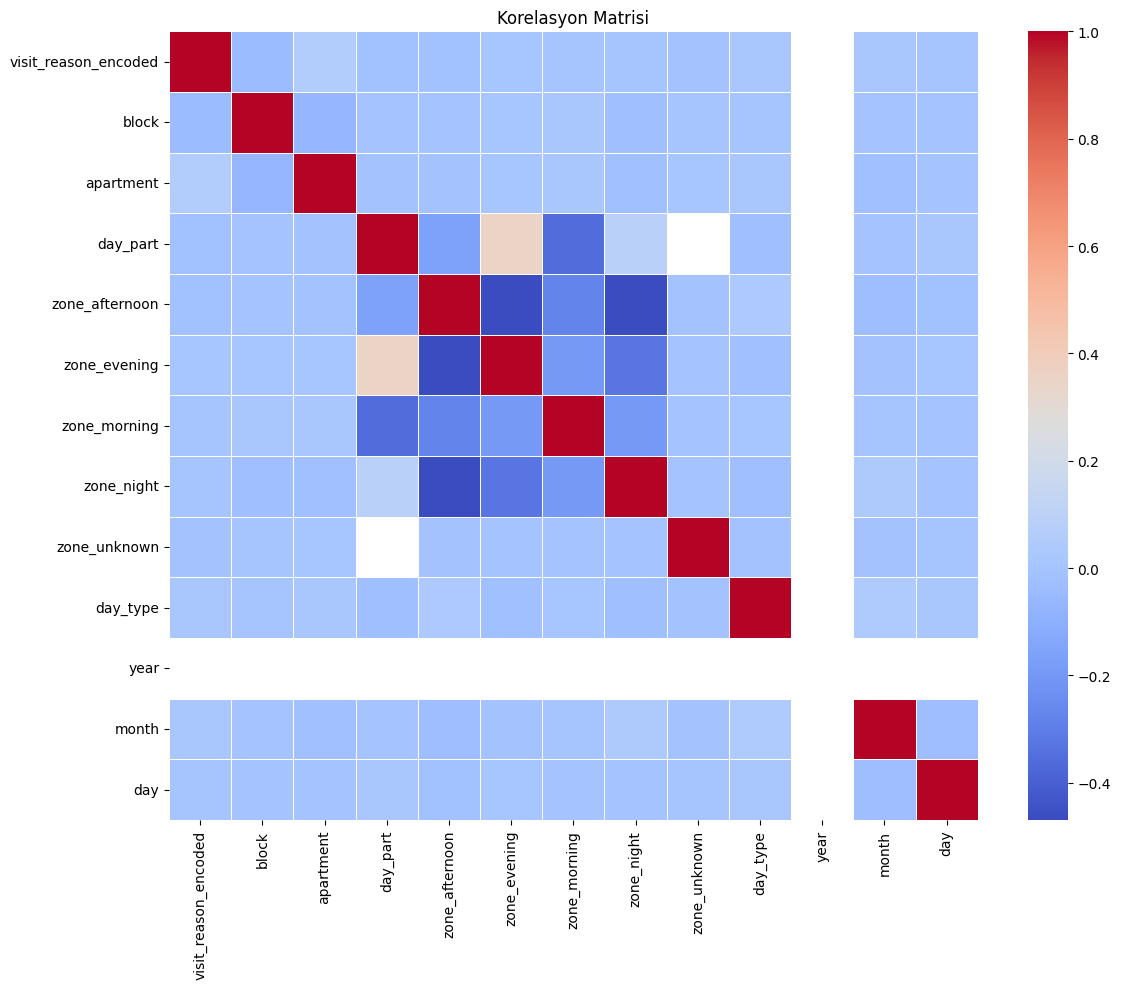

In [32]:
plt.figure(figsize=(12, 10))
corr = classification_data.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()

Since there is no linear correlation, the chosen models should be those that handle non-linear relationships well, such as Random Forest.


---



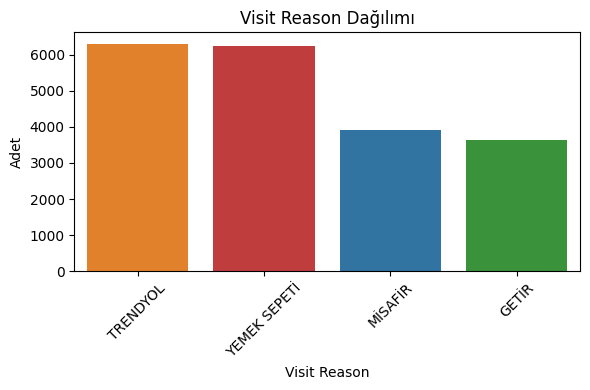

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="visit_reason", order=df["visit_reason"].value_counts().index, hue="visit_reason")
plt.title("Visit Reason Dağılımı")
plt.xlabel("Visit Reason")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph show the amount of visit from most biger 4 value.


---



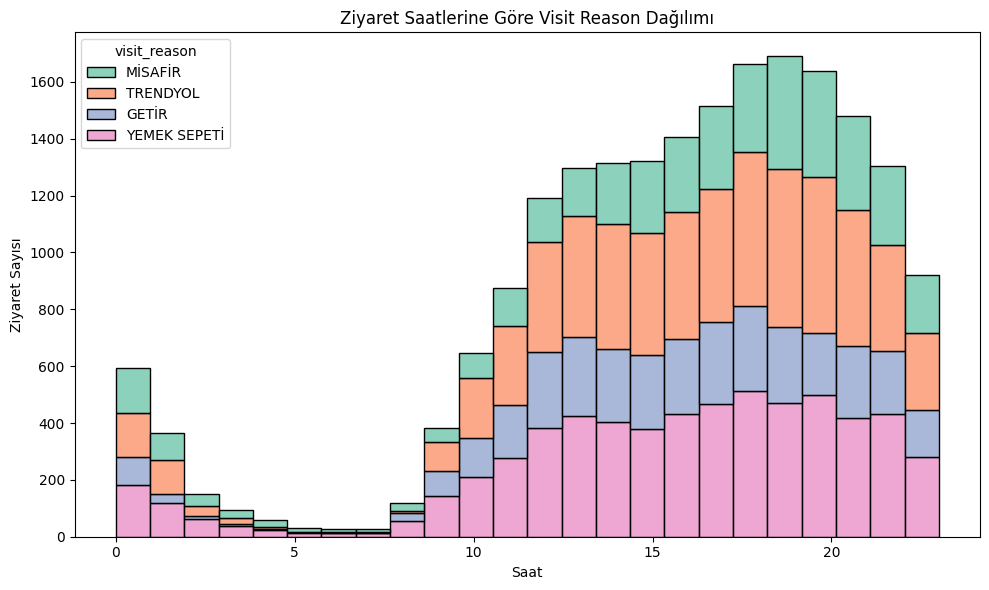

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="day_part", hue="visit_reason", multiple="stack", bins=24, palette="Set2")
plt.title("Ziyaret Saatlerine Göre Visit Reason Dağılımı")
plt.xlabel("Saat")
plt.ylabel("Ziyaret Sayısı")
plt.tight_layout()
plt.show()

As we seen, there is a higher number of visitors in the afternoon and evening hours.



---



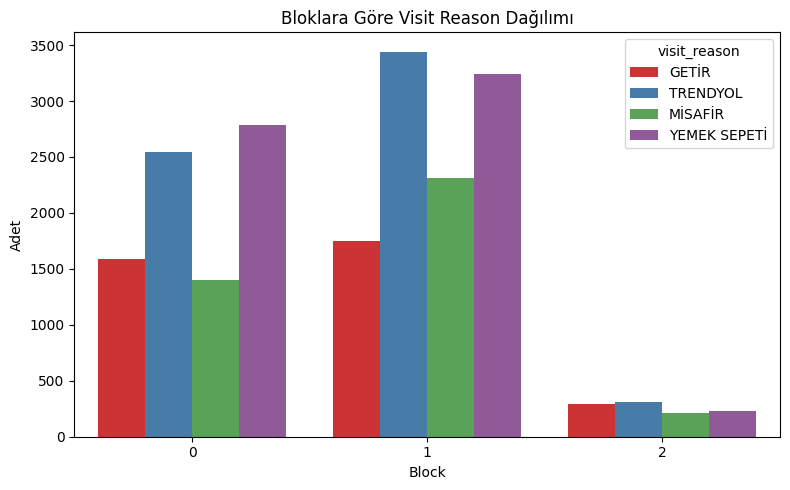

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="block", hue="visit_reason", palette="Set1")
plt.title("Bloklara Göre Visit Reason Dağılımı")
plt.xlabel("Block")
plt.ylabel("Adet")
plt.tight_layout()
plt.show()

0:A, 1:B, 2:C


---
The highest number of flats are B, A and C, respectively. It is observed that this situation also affects the number of visitors.



---




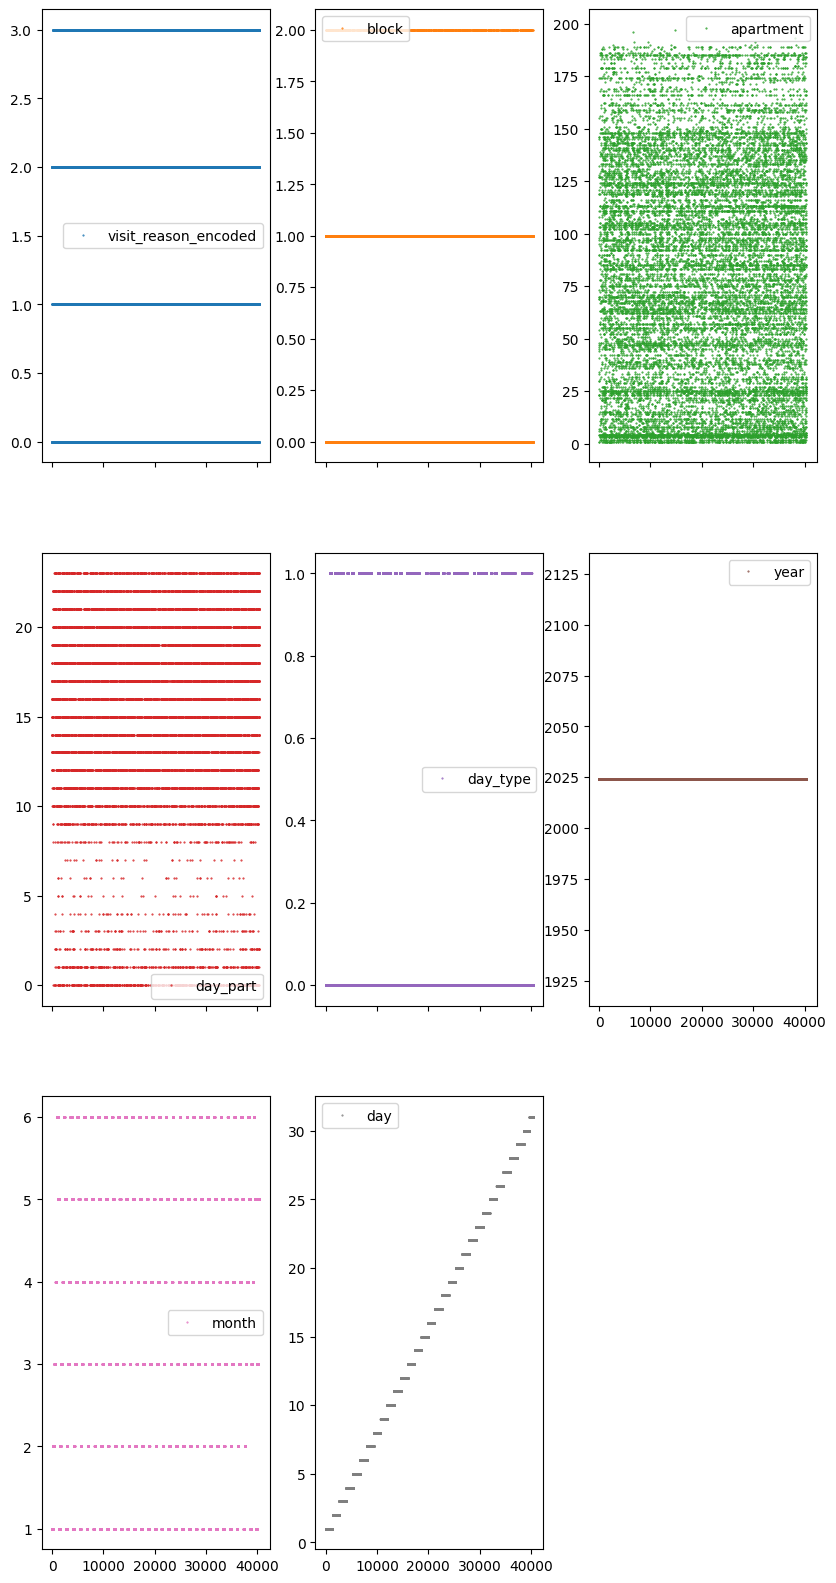

In [36]:
classification_data.plot(lw=0,
        marker=".",
        subplots=True,
        layout=(-1, 3),
        figsize=(10, 20),
        markersize=1);

The plots show no clear linear relationship between any feature and the target—values are scattered seemingly at random across the index. As a result, linear models alone may struggle, and non-linear algorithms like Random Forest or XGBoost, which can capture more complex patterns, are likely to perform better on this data.


---



In [37]:
classification_data.dropna(subset=["day_part"], inplace=True)

In [38]:
classification_data.isnull().sum()

,0
visit_reason_encoded,0
block,0
apartment,0
day_part,0
zone_afternoon,0
zone_evening,0
zone_morning,0
zone_night,0
zone_unknown,0
day_type,0




---


# **Model construction** (the models shall be constructed using at least 6 different classification algorithms)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Set,Accuracy,Error,Precision (macro),Recall (macro),F1-score (macro),AUC
0,Logistic Regression,Train,0.290527,0.709473,0.298361,0.302620,0.289907,0.560938
1,Logistic Regression,Test,0.285430,0.714570,0.291940,0.295668,0.284533,0.561553
2,KNN,Train,0.575771,0.424229,0.568527,0.570955,0.566923,0.834598
3,KNN,Test,0.365241,0.634759,0.354860,0.357096,0.353993,0.607475
4,SVM,Train,0.262556,0.737444,0.219016,0.274348,0.195610,0.521515
5,SVM,Test,0.267031,0.732969,0.228308,0.280563,0.200449,0.530903
6,Decision Tree,Train,0.984958,0.015042,0.982283,0.986987,0.984509,0.999846
7,Decision Tree,Test,0.410244,0.589756,0.397983,0.398992,0.398398,0.600504
8,Random Forest,Train,0.984958,0.015042,0.983136,0.985903,0.984484,0.999798
9,Random Forest,Test,0.392839,0.607161,0.374043,0.368603,0.369687,0.634490


<Figure size 800x500 with 0 Axes>

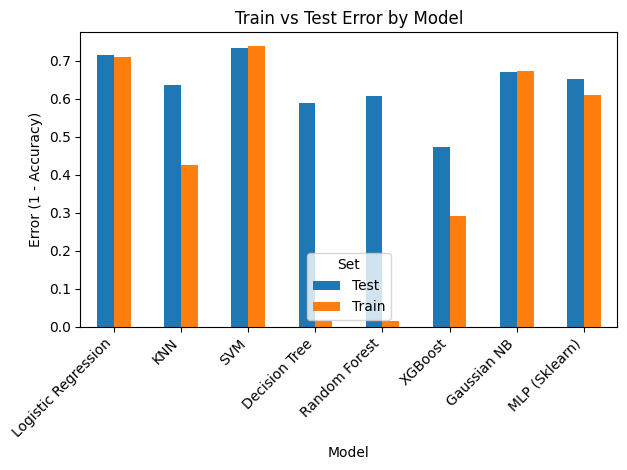

<Figure size 800x500 with 0 Axes>

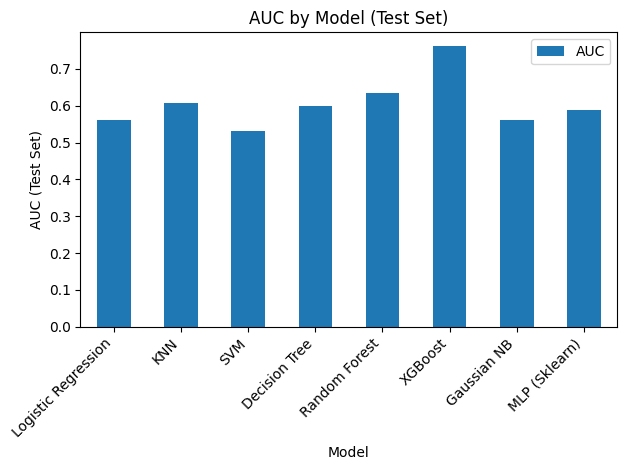

=== Classification Reports (Test Set) ===

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.21      0.34      0.26       727
           1       0.25      0.33      0.28       785
           2       0.36      0.27      0.31      1260
           3       0.35      0.24      0.29      1250

    accuracy                           0.29      4022
   macro avg       0.29      0.30      0.28      4022
weighted avg       0.31      0.29      0.29      4022


--- KNN ---
              precision    recall  f1-score   support

           0       0.27      0.29      0.28       727
           1       0.33      0.36      0.34       785
           2       0.41      0.45      0.43      1260
           3       0.41      0.32      0.36      1250

    accuracy                           0.37      4022
   macro avg       0.35      0.36      0.35      4022
weighted avg       0.37      0.37      0.37      4022


--- SVM ---
              precision    recall

<Figure size 500x400 with 0 Axes>

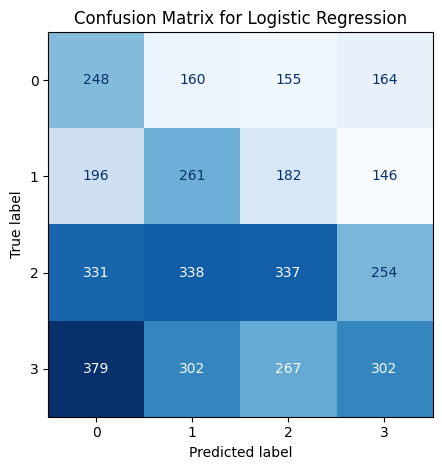

<Figure size 500x400 with 0 Axes>

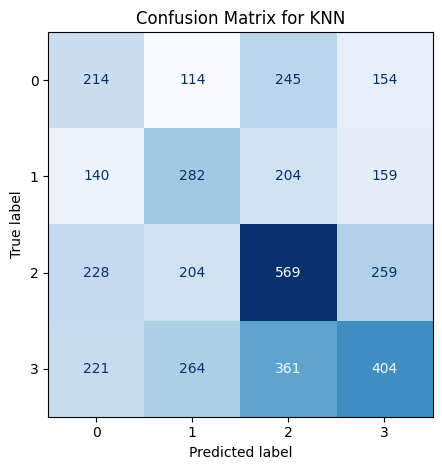

<Figure size 500x400 with 0 Axes>

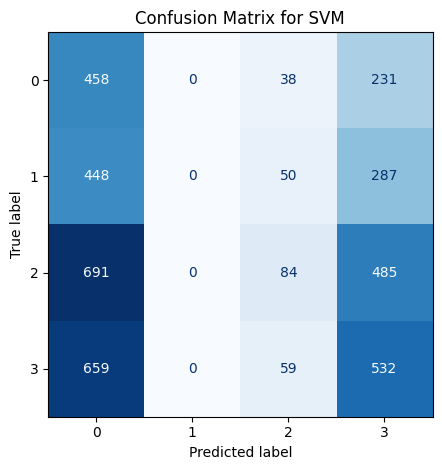

<Figure size 500x400 with 0 Axes>

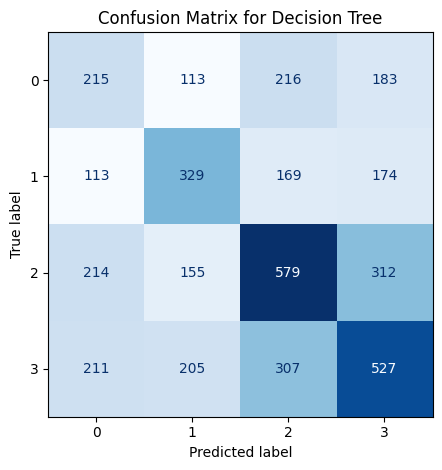

<Figure size 500x400 with 0 Axes>

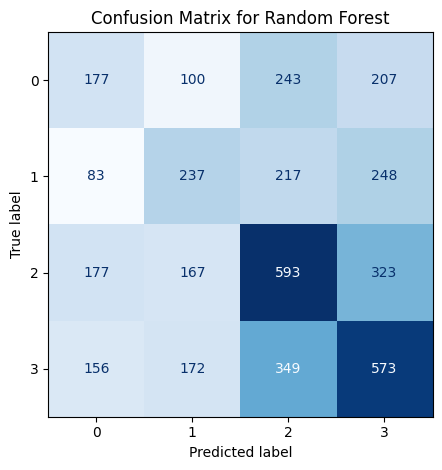

<Figure size 500x400 with 0 Axes>

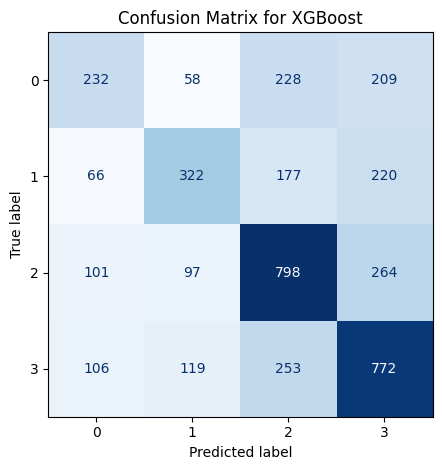

<Figure size 500x400 with 0 Axes>

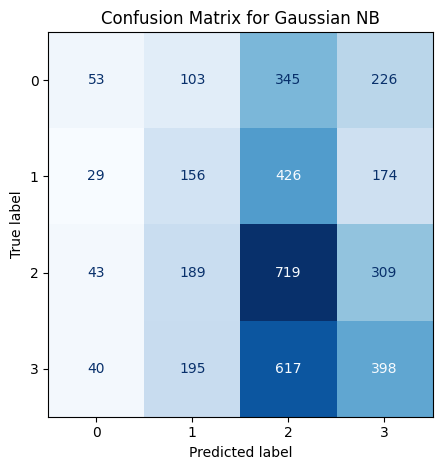

<Figure size 500x400 with 0 Axes>

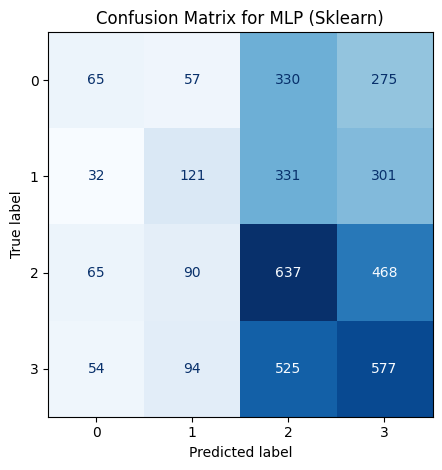

In [43]:



X = classification_data.drop(columns=['visit_reason_encoded'])
y = classification_data['visit_reason_encoded']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)


models = [
    ("Logistic Regression",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', LogisticRegression(
             multi_class='multinomial',
             solver='lbfgs',
             class_weight='balanced',
             max_iter=500
         ))
     ])),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC(
         kernel='rbf',
         probability=True,
         class_weight='balanced'
     )),
    ("Decision Tree", DecisionTreeClassifier(class_weight='balanced')),
    ("Random Forest", RandomForestClassifier(
         n_estimators=100,
         class_weight='balanced',
         random_state=42
     )),
    ("XGBoost", XGBClassifier(
         objective='multi:softprob',
         num_class=len(np.unique(y)),
         scale_pos_weight=1,
         eval_metric='merror',
         use_label_encoder=False,
         verbosity=0,
         random_state=42
     )),
    ("Gaussian NB",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', GaussianNB())
     ])),
    ("MLP (Sklearn)",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', MLPClassifier(
             hidden_layer_sizes=(100,),
             max_iter=200,
             random_state=42
         ))
     ])),
]


results = []
classification_reports = {}
xgb_evals = None


for name, model in models:
    if name == "XGBoost":

        model.fit(
            X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=False
        )
        xgb_evals = model.evals_result()
    else:

        model.fit(X_train, y_train)


    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # 5.2) Classification report
    cr = classification_report(y_test, y_test_pred, zero_division=0)
    classification_reports[name] = cr

    # 5.3) calculate metrics
    for ds_name, X_, y_, y_pred, y_prob in [
        ("Train", X_train, y_train, model.predict(X_train),
         (model.predict_proba(X_train) if hasattr(model, "predict_proba") else None)),
        ("Test",  X_test,  y_test,  y_test_pred, y_test_prob)
    ]:
        # AUC calculation
        if y_prob is not None:
            try:
                auc = roc_auc_score(y_, y_prob, multi_class="ovr", average="macro")
            except ValueError:
                if len(np.unique(y_)) >= 2:
                    auc = roc_auc_score(y_, y_prob[:, 1])
                else:
                    auc = np.nan
        else:
            auc = np.nan

        acc  = accuracy_score(y_, y_pred)
        prec = precision_score(y_, y_pred, average="macro", zero_division=0)
        rec  = recall_score(y_, y_pred, average="macro", zero_division=0)
        f1   = f1_score(y_, y_pred, average="macro", zero_division=0)

        results.append({
            "Model": name,
            "Set": ds_name,
            "Accuracy": acc,
            "Error": 1 - acc,
            "Precision (macro)": prec,
            "Recall (macro)": rec,
            "F1-score (macro)": f1,
            "AUC": auc
        })

# 6)Convert DataFrame
metrics_df = pd.DataFrame(results)
display(metrics_df)

# ----------------------------------------------------------------------
# 7) Train vs Test Error
pivot_error = metrics_df.pivot(index="Model", columns="Set", values="Error")
pivot_error = pivot_error.reindex([m[0] for m in models])  # Model sırasını koru

plt.figure(figsize=(8, 5))
pivot_error.plot(kind="bar")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Train vs Test Error by Model")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 8) AUC Graph
auc_df = metrics_df[metrics_df["Set"] == "Test"][["Model", "AUC"]].set_index("Model")
auc_df = auc_df.reindex([m[0] for m in models])

plt.figure(figsize=(8, 5))
auc_df.plot(kind="bar")
plt.ylabel("AUC (Test Set)")
plt.title("AUC by Model (Test Set)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 9) Classification Report
print("=== Classification Reports (Test Set) ===\n")
for name, report in classification_reports.items():
    print(f"--- {name} ---")
    print(report)
    print()

# ----------------------------------------------------------------------
# 10) Confusion Matrix
classes = np.unique(y_test)

for name, model in models:
    # predict
    y_test_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_test_pred, labels=classes)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    plt.figure(figsize=(5, 4))
    disp.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()





The lowest performance is observed in the Logistic Regression and Gaussian NB models. Both models achieve only 26–33% accuracy on training and test sets, and their macro F1-scores remain low. Decision Tree and Random Forest models achieve nearly 98% accuracy on the training set but fall to the 39–41% range on the test set, clearly demonstrating overfitting. The most consistent results come from the XGBoost and MLP (Sklearn) models. XGBoost achieves 71% accuracy on training and 52.8% on test, with a macro F1-score of about 50% and an AUC of 0.76, outperforming the other models by maintaining balanced class separation and controlling overfitting.

 In summary, XGBoost offers the best performance on this dataset, while the other models either remain generally weak or suffer from overfitting issues.


---



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression - Best Params: {'clf__C': 0.1, 'clf__penalty': 'l2'}
KNN - Best Params: {'n_neighbors': 7, 'weights': 'distance'}
SVM - Best Params: {'C': 1, 'gamma': 'auto'}
Decision Tree - Best Params: {'max_depth': 20, 'min_samples_split': 10}
Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
XGBoost - Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gaussian NB - Best Params: {'clf__var_smoothing': 1e-09}
MLP (Sklearn) - Best Params: {'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (50, 50)}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Set,Accuracy,Error,Precision (macro),Recall (macro),F1-score (macro),AUC
0,Logistic Regression,Train,0.290527,0.709473,0.298377,0.302650,0.289911,0.560938
1,Logistic Regression,Test,0.285182,0.714818,0.291682,0.295468,0.284289,0.561554
2,KNN,Train,0.984958,0.015042,0.982303,0.986965,0.984509,0.999846
3,KNN,Test,0.396569,0.603431,0.377790,0.372705,0.373251,0.620143
4,SVM,Train,0.650858,0.349142,0.645727,0.662366,0.648485,0.886589
5,SVM,Test,0.390104,0.609896,0.386073,0.391567,0.384779,0.639558
6,Decision Tree,Train,0.673297,0.326703,0.671717,0.691062,0.671799,0.911246
7,Decision Tree,Test,0.432621,0.567379,0.431911,0.437188,0.427831,0.665671
8,Random Forest,Train,0.582297,0.417703,0.578215,0.585297,0.577911,0.830379
9,Random Forest,Test,0.396569,0.603431,0.390030,0.394348,0.389408,0.661920


<Figure size 800x500 with 0 Axes>

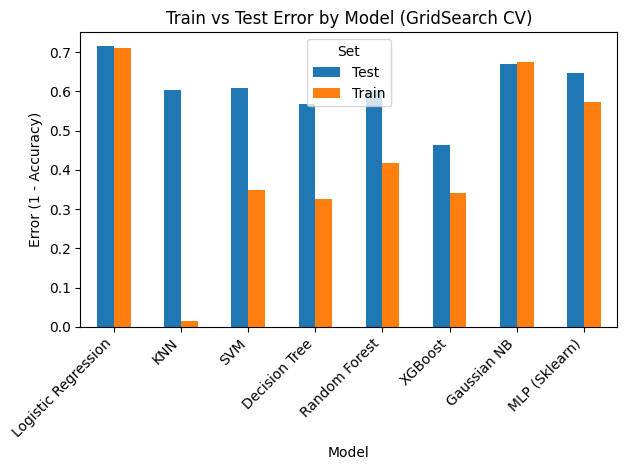

<Figure size 800x500 with 0 Axes>

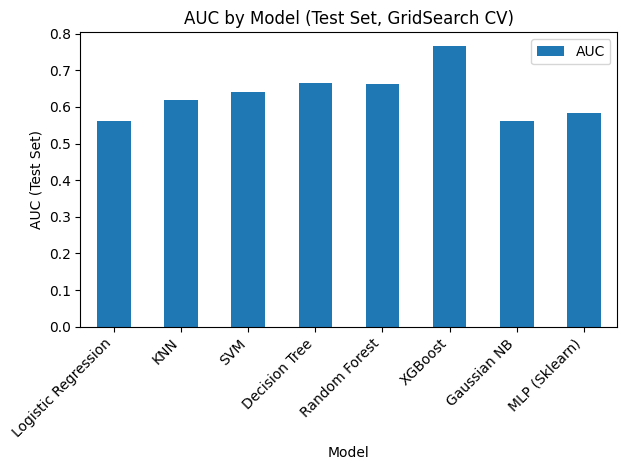

=== Classification Reports (Test Set, GridSearch CV) ===

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.22      0.34      0.26       727
           1       0.25      0.33      0.28       785
           2       0.36      0.27      0.31      1260
           3       0.35      0.24      0.28      1250

    accuracy                           0.29      4022
   macro avg       0.29      0.30      0.28      4022
weighted avg       0.31      0.29      0.29      4022


--- KNN ---
              precision    recall  f1-score   support

           0       0.30      0.22      0.25       727
           1       0.37      0.34      0.35       785
           2       0.42      0.47      0.45      1260
           3       0.42      0.46      0.44      1250

    accuracy                           0.40      4022
   macro avg       0.38      0.37      0.37      4022
weighted avg       0.39      0.40      0.39      4022


--- SVM ---
              prec

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [44]:



X = classification_data.drop(columns=['visit_reason_encoded'])
y = classification_data['visit_reason_encoded']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# 3) Pipeline and Grid param
models_and_grids = [
    (
        "Logistic Regression",
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(
                multi_class='multinomial',
                solver='lbfgs',
                class_weight='balanced',
                max_iter=500
            ))
        ]),
        {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l2']
        }
    ),
    (
        "KNN",
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    ),
    (
        "SVM",
        SVC(kernel='rbf', probability=True, class_weight='balanced'),
        {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    ),
    (
        "Decision Tree",
        DecisionTreeClassifier(class_weight='balanced'),
        {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    ),
    (
        "Random Forest",
        RandomForestClassifier(class_weight='balanced', random_state=42),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    ),
    (
        "XGBoost",
        XGBClassifier(
            objective='multi:softprob',
            num_class=len(np.unique(y)),
            scale_pos_weight=1,
            use_label_encoder=False,
            eval_metric='merror',
            verbosity=0,
            random_state=42
        ),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    ),
    (
        "Gaussian NB",
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', GaussianNB())
        ]),
        {
            'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    ),
    (
        "MLP (Sklearn)",
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', MLPClassifier(
                hidden_layer_sizes=(100,),
                max_iter=200,
                random_state=42
            ))
        ]),
        {
            'clf__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'clf__alpha': [1e-4, 1e-3, 1e-2]
        }
    ),
]

# 4) GridSearchCV
results = []
classification_reports = {}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, estimator, param_grid in models_and_grids:

    grid = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring='f1_macro',
        cv=cv_strategy,
        n_jobs=-1,
        refit=True
    )
    # 4.2) train
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print(f"{name} - Best Params: {grid.best_params_}")

    # 4.3) predict
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

    # 4.4) Classification report
    cr = classification_report(y_test, y_test_pred, zero_division=0)
    classification_reports[name] = cr


    for ds_name, X_, y_, y_pred, y_prob in [
        ("Train", X_train, y_train, best_model.predict(X_train),
         (best_model.predict_proba(X_train) if hasattr(best_model, "predict_proba") else None)),
        ("Test",  X_test,  y_test,  y_test_pred, y_test_prob)
    ]:
        # AUC calculation
        if y_prob is not None:
            try:
                auc = roc_auc_score(y_, y_prob, multi_class="ovr", average="macro")
            except ValueError:
                if len(np.unique(y_)) >= 2:
                    auc = roc_auc_score(y_, y_prob[:, 1])
                else:
                    auc = np.nan
        else:
            auc = np.nan

        acc  = accuracy_score(y_, y_pred)
        prec = precision_score(y_, y_pred, average="macro", zero_division=0)
        rec  = recall_score(y_, y_pred, average="macro", zero_division=0)
        f1   = f1_score(y_, y_pred, average="macro", zero_division=0)

        results.append({
            "Model": name,
            "Set": ds_name,
            "Accuracy": acc,
            "Error": 1 - acc,
            "Precision (macro)": prec,
            "Recall (macro)": rec,
            "F1-score (macro)": f1,
            "AUC": auc
        })

# 5) Convert DataFrame
metrics_df = pd.DataFrame(results)
display(metrics_df)

# ----------------------------------------------------------------------
# 6) Train vs Test Error
pivot_error = metrics_df.pivot(index="Model", columns="Set", values="Error")
pivot_error = pivot_error.reindex([m[0] for m in models_and_grids])  # Model sırasını koru

plt.figure(figsize=(8, 5))
pivot_error.plot(kind="bar")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Train vs Test Error by Model (GridSearch CV)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 7) AUC Graph
auc_df = metrics_df[metrics_df["Set"] == "Test"][["Model", "AUC"]].set_index("Model")
auc_df = auc_df.reindex([m[0] for m in models_and_grids])

plt.figure(figsize=(8, 5))
auc_df.plot(kind="bar")
plt.ylabel("AUC (Test Set)")
plt.title("AUC by Model (Test Set, GridSearch CV)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 8) Classification Report
print("=== Classification Reports (Test Set, GridSearch CV) ===\n")
for name, report in classification_reports.items():
    print(f"--- {name} ---")
    print(report)
    print()

# ----------------------------------------------------------------------
# 9) Confusion Matrix
classes = np.unique(y_test)

for name, estimator, _ in models_and_grids:

    best_model = GridSearchCV(estimator=Pipeline([]), param_grid={}).best_estimator_  # placeholder


    best_model = classification_reports[name]


    y_test_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    plt.figure(figsize=(5, 4))
    disp.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()




The lowest performers are Logistic Regression, Gaussian NB, and MLP, each achieving only around 30–35% accuracy with low F1 and AUC scores (~0.56–0.58). Overfitting is most pronounced in KNN (98% train vs. 39% test) and, to a lesser extent, in Decision Tree/Random Forest (train ~58–67%, test ~39–43%).

XGBoost is the most consistent and best model, with about 66% training accuracy and 53.6% test accuracy, a macro F1 of around 50%, and an AUC of ~0.765, indicating balanced class separation and relatively low overfitting; therefore, XGBoost stands out as the top choice for this dataset.




---



In [45]:
df["visit_reason_binary"] = np.where(
    df["visit_reason"] == "MİSAFİR",
    0,   # “MİSAFİR” : 0
    1    # (TRENDYOL, YEMEK SEPETİ, GETİR) : 1
)

df[["visit_reason", "visit_reason_binary"]].head(10)

,visit_reason,visit_reason_binary
2,MİSAFİR,0
5,TRENDYOL,1
7,TRENDYOL,1
8,GETİR,1
9,GETİR,1
10,GETİR,1
11,GETİR,1
14,TRENDYOL,1
15,GETİR,1
16,TRENDYOL,1


In [46]:
binary_classification_data = df[["visit_reason_binary", "block", "apartment", "day_part", "zone_afternoon", "zone_evening", "zone_morning", "zone_night", "zone_unknown","day_type", "year", "month","day"]].copy()


In [47]:
counts = df["visit_reason_binary"].value_counts()
print(counts)

percentages = df["visit_reason_binary"].value_counts(normalize=True) * 100
print(percentages.round(2))

visit_reason_binary
1    16186
0     3925
Name: count, dtype: int64
visit_reason_binary
1    80.48
0    19.52
Name: proportion, dtype: float64


SMOTE sonrası eğitim seti sınıf dağılımı:
visit_reason_binary
0    12948
1    12948
Name: count, dtype: int64

Yüzde olarak:
visit_reason_binary
0    50.0
1    50.0
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Set,Accuracy,Error,Precision,Recall,F1-score,AUC
0,Logistic Regression,Train,0.529657,0.470343,0.531068,0.506951,0.518729,0.541089
1,Logistic Regression,Test,0.520756,0.479244,0.826520,0.512044,0.632342,0.544248
2,KNN,Train,0.860403,0.139597,0.871685,0.845227,0.858252,0.942620
3,KNN,Test,0.671638,0.328362,0.818968,0.760037,0.788403,0.562839
4,SVM,Train,0.719764,0.280236,0.666764,0.878669,0.758189,0.803647
5,SVM,Test,0.733532,0.266468,0.813550,0.867820,0.839809,0.573177
6,Decision Tree,Train,0.996023,0.003977,0.999533,0.992508,0.996009,0.999968
7,Decision Tree,Test,0.735521,0.264479,0.841394,0.827363,0.834320,0.592950
8,Random Forest,Train,0.996023,0.003977,0.994457,0.997606,0.996029,0.999941
9,Random Forest,Test,0.783495,0.216505,0.827205,0.924027,0.872939,0.664816


<Figure size 800x500 with 0 Axes>

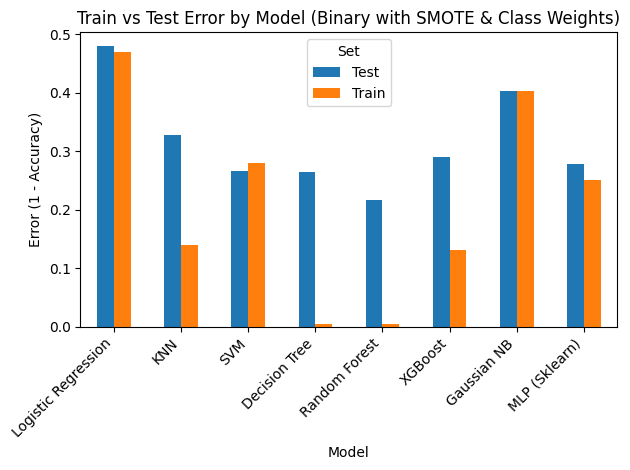

<Figure size 800x500 with 0 Axes>

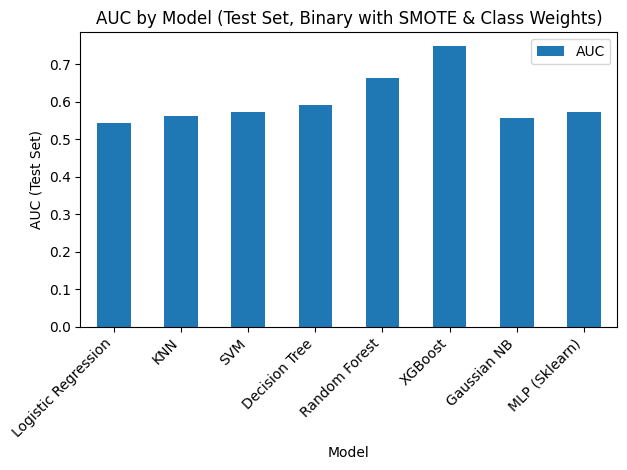

=== Classification Reports (Test Set, Binary with SMOTE & Class Weights) ===

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.22      0.56      0.31       785
           1       0.83      0.51      0.63      3238

    accuracy                           0.52      4023
   macro avg       0.52      0.53      0.47      4023
weighted avg       0.71      0.52      0.57      4023


--- KNN ---
              precision    recall  f1-score   support

           0       0.24      0.31      0.27       785
           1       0.82      0.76      0.79      3238

    accuracy                           0.67      4023
   macro avg       0.53      0.53      0.53      4023
weighted avg       0.71      0.67      0.69      4023


--- SVM ---
              precision    recall  f1-score   support

           0       0.25      0.18      0.21       785
           1       0.81      0.87      0.84      3238

    accuracy                           0.73      4

<Figure size 500x400 with 0 Axes>

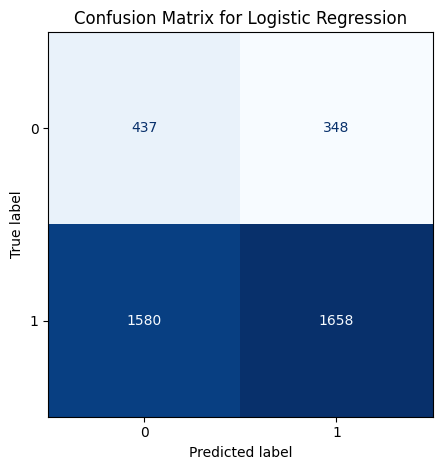

<Figure size 500x400 with 0 Axes>

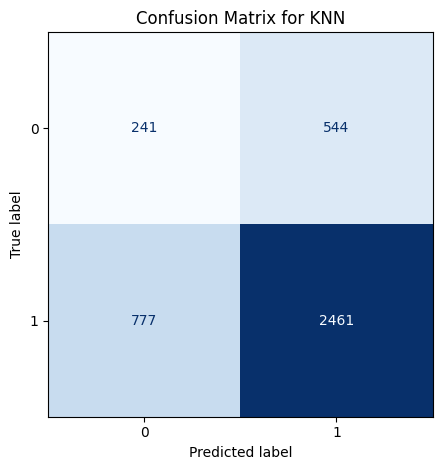

<Figure size 500x400 with 0 Axes>

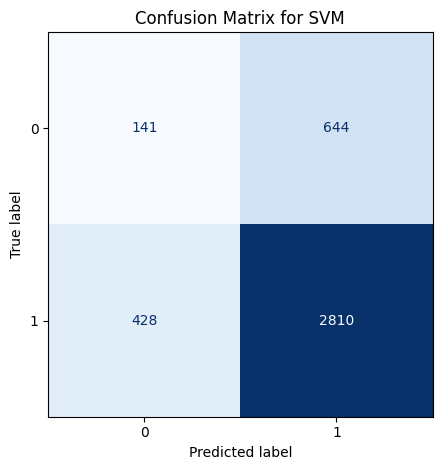

<Figure size 500x400 with 0 Axes>

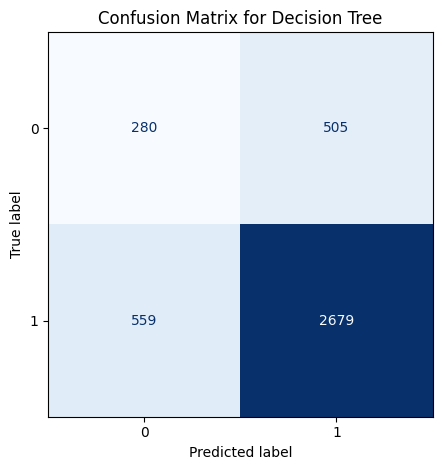

<Figure size 500x400 with 0 Axes>

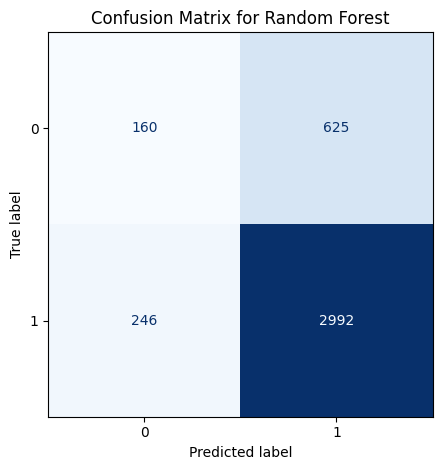

<Figure size 500x400 with 0 Axes>

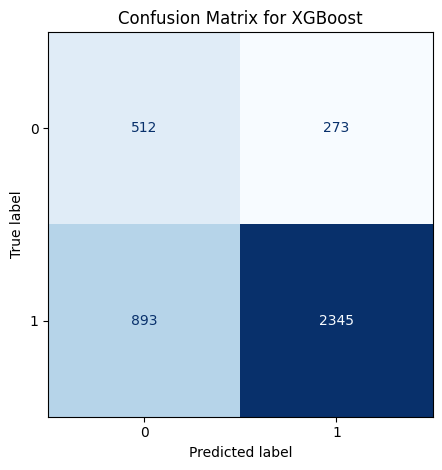

<Figure size 500x400 with 0 Axes>

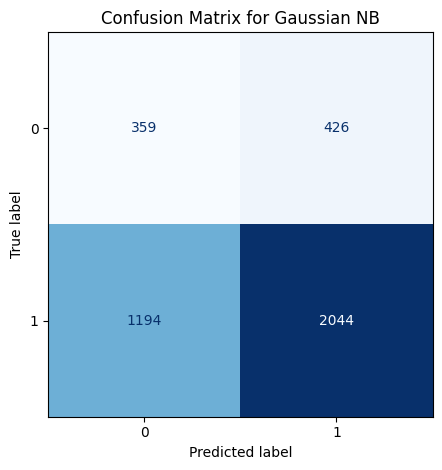

<Figure size 500x400 with 0 Axes>

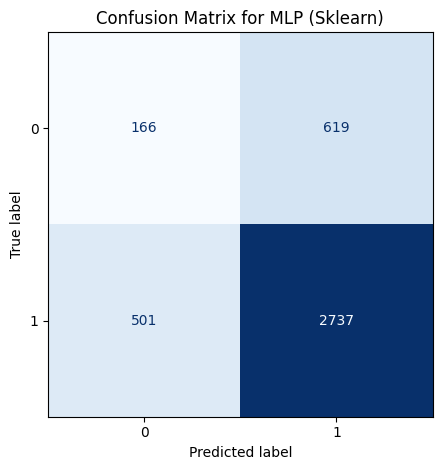

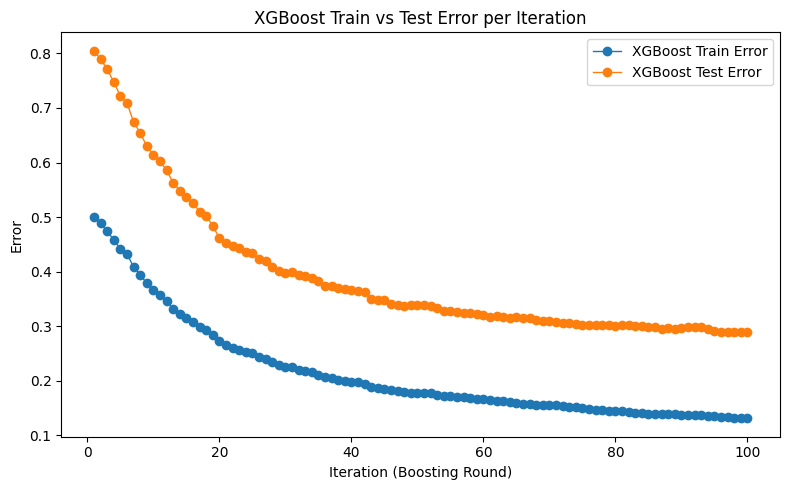

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [49]:

# ----------------------------------------------------------------------

X = binary_classification_data.drop(columns=['visit_reason_binary'])
y = binary_classification_data['visit_reason_binary']

# ----------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

# ----------------------------------------------------------------------
# 3) scale_pos_weight calculation
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
scale_pos_weight = neg_count / pos_count

# ----------------------------------------------------------------------
# 4) data handling
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ],
    remainder='drop'
)

# 5) data pre proessing
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# ----------------------------------------------------------------------
# 6) SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)

print("SMOTE sonrası eğitim seti sınıf dağılımı:")
print(y_train_resampled.value_counts())
print("\nYüzde olarak:")
print((y_train_resampled.value_counts(normalize=True) * 100).round(2))

# ----------------------------------------------------------------------

models = [
    ("Logistic Regression",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=500))
     ])),
    ("KNN",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', KNeighborsClassifier())
     ])),
    ("SVM",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', SVC(kernel='rbf', probability=True, class_weight='balanced'))
     ])),
    ("Decision Tree",
     DecisionTreeClassifier(class_weight='balanced')),
    ("Random Forest",
     RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ("XGBoost",
     XGBClassifier(
         objective='binary:logistic',
         scale_pos_weight=scale_pos_weight,
         eval_metric='error',
         use_label_encoder=False,
         verbosity=0,
         random_state=42
     )),
    ("Gaussian NB",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', GaussianNB())
     ])),
    ("MLP (Sklearn)",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42))
     ])),
]

# ----------------------------------------------------------------------
results_binary = []
classification_reports_binary = {}
trained_models = {}

xgb_evals = None

for name, model in models:

    if name == "XGBoost":
        model.fit(
            X_train_resampled, y_train_resampled,
            eval_set=[(X_train_resampled, y_train_resampled), (X_test_prep, y_test)],
            verbose=False
        )
        xgb_evals = model.evals_result()
    else:
        model.fit(X_train_resampled, y_train_resampled)

    trained_models[name] = model

    # predict
    y_test_pred = model.predict(X_test_prep)
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test_prep)[:, 1]
    else:
        y_test_prob = None

    cr = classification_report(y_test, y_test_pred, zero_division=0)
    classification_reports_binary[name] = cr

    # 8.2) calculate metrics
    for ds_name, X_, y_, y_pred, y_prob in [
        ("Train", X_train_resampled, y_train_resampled, model.predict(X_train_resampled),
         (model.predict_proba(X_train_resampled)[:, 1] if hasattr(model, "predict_proba") else None)
         ),
        ("Test", X_test_prep, y_test, y_test_pred, y_test_prob)
    ]:
        if y_prob is not None:
            try:
                auc = roc_auc_score(y_, y_prob)
            except ValueError:
                auc = np.nan
        else:
            auc = np.nan

        acc = accuracy_score(y_, y_pred)
        prec = precision_score(y_, y_pred, zero_division=0)
        rec = recall_score(y_, y_pred, zero_division=0)
        f1 = f1_score(y_, y_pred, zero_division=0)

        results_binary.append({
            "Model": name,
            "Set": ds_name,
            "Accuracy": acc,
            "Error": 1 - acc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1,
            "AUC": auc
        })

# ----------------------------------------------------------------------
# Convert Dataframe
binary_metrics_df = pd.DataFrame(results_binary)
display(binary_metrics_df)

# ----------------------------------------------------------------------
# 10) Train vs Test Error
pivot_error = binary_metrics_df.pivot(index="Model", columns="Set", values="Error")
pivot_error = pivot_error.reindex([m[0] for m in models])

plt.figure(figsize=(8, 5))
pivot_error.plot(kind="bar")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Train vs Test Error by Model (Binary with SMOTE & Class Weights)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 11) AUC Graph
auc_df = binary_metrics_df[binary_metrics_df["Set"] == "Test"][["Model", "AUC"]].set_index("Model")
auc_df = auc_df.reindex([m[0] for m in models])

plt.figure(figsize=(8, 5))
auc_df.plot(kind="bar")
plt.ylabel("AUC (Test Set)")
plt.title("AUC by Model (Test Set, Binary with SMOTE & Class Weights)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 12) Classification Report
print("=== Classification Reports (Test Set, Binary with SMOTE & Class Weights) ===\n")
for name, report in classification_reports_binary.items():
    print(f"--- {name} ---")
    print(report)
    print()

# ----------------------------------------------------------------------
# 13) Confusion Matrix
classes = np.unique(y_test)  # Örneğin [0,1]

for name, model in trained_models.items():
    y_test_pred = model.predict(X_test_prep)
    cm = confusion_matrix(y_test, y_test_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    plt.figure(figsize=(5, 4))
    disp.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

# ----------------------------------------------------------------------
# 14) XGBoost iteration error graph
if xgb_evals is not None:
    train_error = xgb_evals['validation_0']['error']
    test_error  = xgb_evals['validation_1']['error']
    iterations = np.arange(1, len(train_error) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(iterations, train_error, label='XGBoost Train Error', marker='o', linewidth=1)
    plt.plot(iterations, test_error,  label='XGBoost Test Error',  marker='o', linewidth=1)
    plt.xlabel('Iteration (Boosting Round)')
    plt.ylabel('Error')
    plt.title('XGBoost Train vs Test Error per Iteration')
    plt.legend()
    plt.tight_layout()
    plt.show()


Logistic Regression and Gaussian NB both show low performance, with training and test accuracies around 52–60% and AUC scores of about 0.55. KNN overfits, reaching 86% accuracy on training but dropping to 67% on test. SVM (72–73% accuracy, F1 ~84%, AUC ~0.57) and MLP (75–72% accuracy, F1 ~83%, AUC ~0.57) stay balanced on both training and test, with almost no overfitting.

 Decision Tree (99% training, 73% test) and Random Forest (99% training, 78% test) also overfit, but Random Forest gives the best test results with 78% accuracy and F1 ~87%. XGBoost (87% training, 71% test) controls overfitting better and, with a test AUC of ~0.75, offers the most balanced class separation.


---



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


===== 5-Fold CV Sonuçları (En İyi Hiperparametrelerle) =====
                     Accuracy  Precision    Recall  F1-score       AUC
Model                                                                 
Logistic Regression  0.523743   0.824246  0.518966  0.636596  0.537356
KNN                  0.687833   0.824358  0.777895  0.800435  0.570980
SVM                  0.753170   0.816198  0.894848  0.853701  0.575200
Decision Tree        0.737358   0.847033  0.822131  0.834384  0.605229
Random Forest        0.794590   0.832988  0.931546  0.879513  0.684349
XGBoost              0.706678   0.896940  0.718091  0.797573  0.755434
Gaussian NB          0.592462   0.827852  0.623256  0.711097  0.561607
MLP (Sklearn)        0.731441   0.819947  0.853825  0.836481  0.582883


<Figure size 800x500 with 0 Axes>

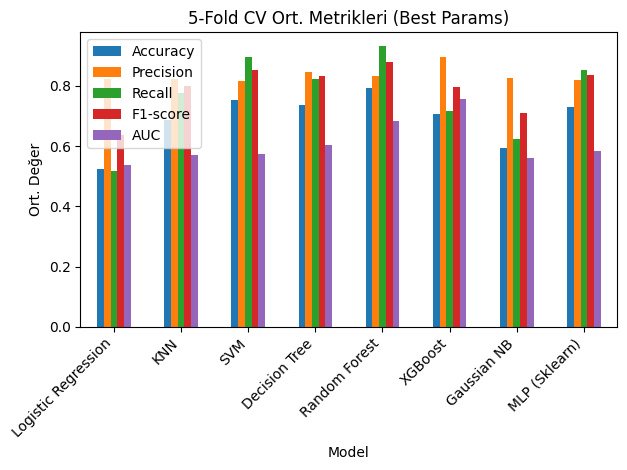


=== 5-Fold CV Sonrasında Son Fold Classification Report ===

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.21      0.56      0.31       785
           1       0.82      0.51      0.63      3237

    accuracy                           0.52      4022
   macro avg       0.52      0.53      0.47      4022
weighted avg       0.71      0.52      0.57      4022

--- KNN ---
              precision    recall  f1-score   support

           0       0.25      0.31      0.28       785
           1       0.82      0.78      0.80      3237

    accuracy                           0.69      4022
   macro avg       0.54      0.54      0.54      4022
weighted avg       0.71      0.69      0.70      4022

--- SVM ---
              precision    recall  f1-score   support

           0       0.29      0.17      0.22       785
           1       0.82      0.90      0.85      3237

    accuracy                           0.76      4022
   macro avg  

<Figure size 500x400 with 0 Axes>

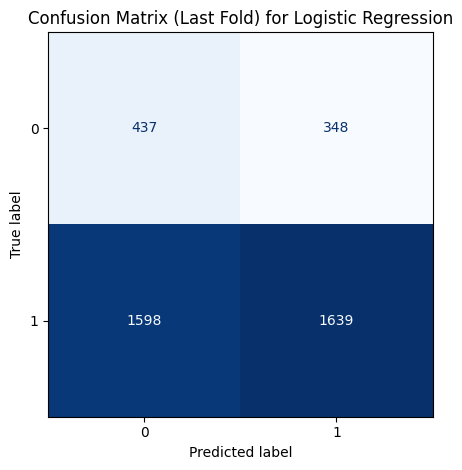

<Figure size 500x400 with 0 Axes>

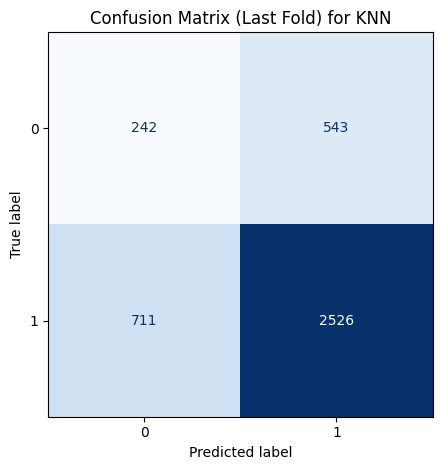

<Figure size 500x400 with 0 Axes>

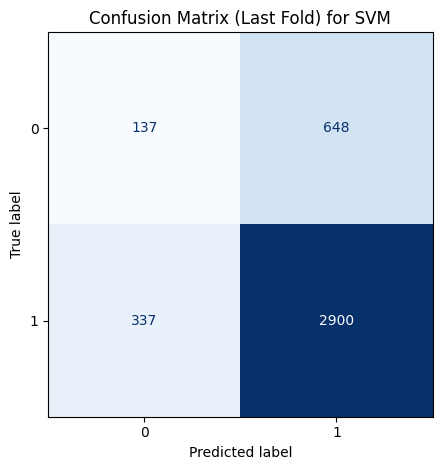

<Figure size 500x400 with 0 Axes>

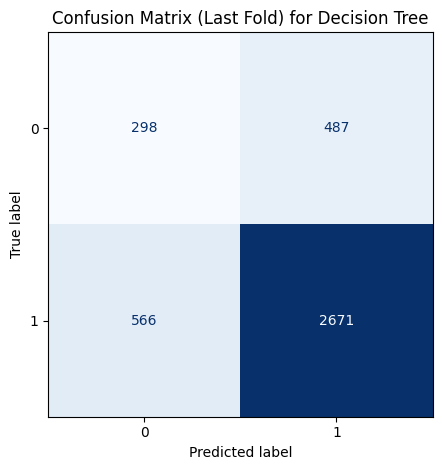

<Figure size 500x400 with 0 Axes>

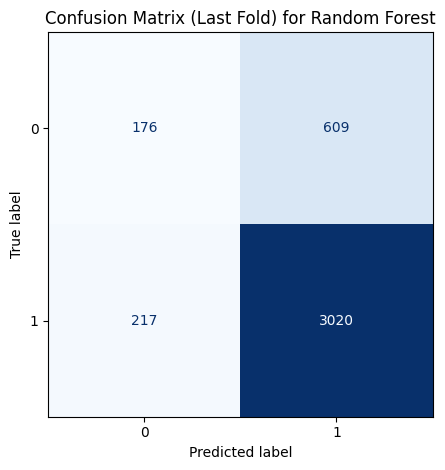

<Figure size 500x400 with 0 Axes>

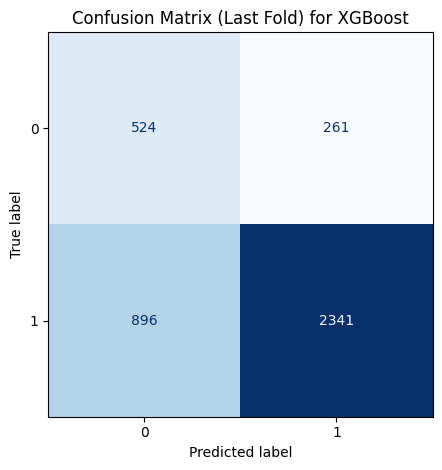

<Figure size 500x400 with 0 Axes>

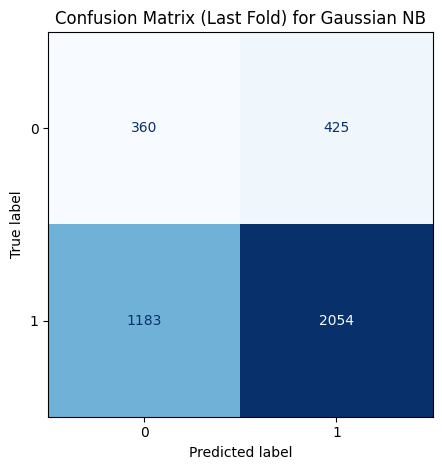

<Figure size 500x400 with 0 Axes>

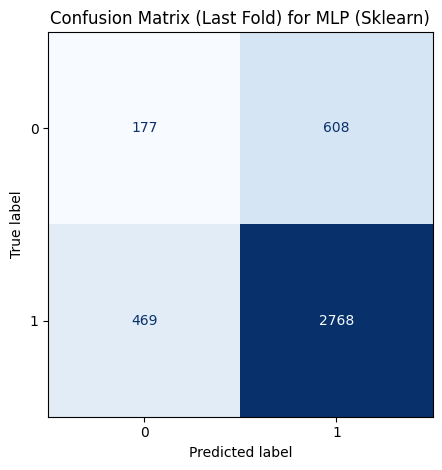

In [58]:
# ----------------------------------------------------------------------

X = binary_classification_data.drop(columns=['visit_reason_binary'])
y = binary_classification_data['visit_reason_binary']

# ----------------------------------------------------------------------
# 1) Outer Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# ----------------------------------------------------------------------

neg_count = (y == 0).sum()
pos_count = (y == 1).sum()
scale_pos_weight = neg_count / pos_count

# ----------------------------------------------------------------------

param_grids = {
    "Logistic Regression": {
        "clf__C": [0.01, 0.1, 1, 10],
        "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs"]
    },
    "KNN": {
        "clf__n_neighbors": [3, 5, 7],
        "clf__weights": ["uniform", "distance"]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__gamma": ["scale", "auto"],
        "clf__kernel": ["rbf"]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },
    "XGBoost": {
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1],
        "n_estimators": [50, 100, 200]
    },
    "Gaussian NB": {
        "clf__var_smoothing": [1e-09, 1e-08, 1e-07]
    },
    "MLP (Sklearn)": {
        "clf__hidden_layer_sizes": [(50,), (100,)],
        "clf__alpha": [0.0001, 0.001],
        "clf__learning_rate_init": [0.001, 0.01]
    }
}

# ----------------------------------------------------------------------

models = [
    ("Logistic Regression",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', LogisticRegression(class_weight='balanced', max_iter=500))
     ])),
    ("KNN",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', KNeighborsClassifier())
     ])),
    ("SVM",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', SVC(probability=True, class_weight='balanced'))
     ])),
    ("Decision Tree",
     DecisionTreeClassifier(class_weight='balanced')),
    ("Random Forest",
     RandomForestClassifier(class_weight='balanced', random_state=42)),
    ("XGBoost",
     XGBClassifier(
         objective='binary:logistic',
         scale_pos_weight=scale_pos_weight,
         use_label_encoder=False,
         verbosity=0,
         random_state=42,
         eval_metric="auc"
     )),
    ("Gaussian NB",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', GaussianNB())
     ])),
    ("MLP (Sklearn)",
     Pipeline([
         ('scaler', StandardScaler()),
         ('clf', MLPClassifier(max_iter=200, random_state=42))
     ])),
]

# ----------------------------------------------------------------------
cv_results = []
last_fold_preds = {}

# ----------------------------------------------------------------------
for model_name, base_model in models:
    metrics_sum = {
        "Accuracy": 0.0,
        "Precision": 0.0,
        "Recall": 0.0,
        "F1-score": 0.0,
        "AUC": 0.0
    }


    final_y_val_fold = None
    final_y_val_pred = None
    final_y_val_prob = None

    for train_index, val_index in skf.split(X, y):

        X_train_raw, X_val_raw = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]


        numeric_cols = X_train_raw.select_dtypes(include=np.number).columns.tolist()
        cat_cols = X_train_raw.select_dtypes(include=['object', 'category']).columns.tolist()

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', SimpleImputer(strategy='median'), numeric_cols),
                ('cat', Pipeline([
                    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                ]), cat_cols)
            ],
            remainder='drop'
        )

        # 5.3) Preprocessor fit and transform
        X_train_prep = preprocessor.fit_transform(X_train_raw)
        X_val_prep = preprocessor.transform(X_val_raw)

        # 5.4) SMOTE
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train_prep, y_train_fold)

        # 5.5) Grid SearchCV:
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grids[model_name],
            scoring='roc_auc',
            cv=3,             # 3-fold
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train_res, y_train_res)
        best_model = grid_search.best_estimator_

        # 5.6)predict
        y_val_pred = best_model.predict(X_val_prep)
        if hasattr(best_model, "predict_proba"):
            y_val_prob = best_model.predict_proba(X_val_prep)[:, 1]
        else:
            try:
                raw_scores = best_model.decision_function(X_val_prep)
                scaler = MinMaxScaler()
                y_val_prob = scaler.fit_transform(raw_scores.reshape(-1, 1)).ravel()
            except AttributeError:
                y_val_prob = None

        # 5.7) metrics
        acc = accuracy_score(y_val_fold, y_val_pred)
        prec = precision_score(y_val_fold, y_val_pred, zero_division=0)
        rec = recall_score(y_val_fold, y_val_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_val_pred, zero_division=0)

        if y_val_prob is not None:
            try:
                auc_score = roc_auc_score(y_val_fold, y_val_prob)
            except ValueError:
                auc_score = np.nan
        else:
            auc_score = np.nan

        metrics_sum["Accuracy"] += acc
        metrics_sum["Precision"] += prec
        metrics_sum["Recall"] += rec
        metrics_sum["F1-score"] += f1
        metrics_sum["AUC"] += auc_score

        # last fold results
        final_y_val_fold = y_val_fold
        final_y_val_pred = y_val_pred
        final_y_val_prob = y_val_prob

    # 6) avarage for each metric
    for m in metrics_sum:
        metrics_sum[m] /= n_splits

    cv_results.append({
        "Model": model_name,
        "Accuracy": metrics_sum["Accuracy"],
        "Precision": metrics_sum["Precision"],
        "Recall": metrics_sum["Recall"],
        "F1-score": metrics_sum["F1-score"],
        "AUC": metrics_sum["AUC"]
    })

    last_fold_preds[model_name] = (final_y_val_fold, final_y_val_pred, final_y_val_prob)

# ----------------------------------------------------------------------
# 7) Convert CV results to DataFrame
cv_metrics_df = pd.DataFrame(cv_results).set_index("Model")
print("===== 5-Fold CV Sonuçları (En İyi Hiperparametrelerle) =====")
print(cv_metrics_df)

# ----------------------------------------------------------------------
plt.figure(figsize=(8, 5))
cv_metrics_df[["Accuracy", "Precision", "Recall", "F1-score", "AUC"]].plot(kind="bar")
plt.ylabel("Ort. Değer")
plt.title(f"{n_splits}-Fold CV Ort. Metrikleri (Best Params)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------
# 8) last Fold Classification Report
print(f"\n=== {n_splits}-Fold CV Sonrasında Son Fold Classification Report ===\n")
for model_name, (y_true, y_pred, _) in last_fold_preds.items():
    print(f"--- {model_name} ---")
    print(classification_report(y_true, y_pred, zero_division=0))

# ----------------------------------------------------------------------
# 9) last Fold Confusion Matrix
classes = np.unique(y)

for model_name, (y_true, y_pred, _) in last_fold_preds.items():
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    plt.figure(figsize=(5, 4))
    disp.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(f'Confusion Matrix (Last Fold) for {model_name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

Cross-validation shows that Logistic Regression does poorly (about 52% accuracy, AUC 0.54) because it misses many positives despite high precision. KNN is better (69% accuracy, AUC 0.57) with balanced precision and recall. SVM reaches 76% accuracy (AUC 0.58), catching most positives (recall 0.90) at decent precision. Decision Tree is similar (74% accuracy, AUC 0.60) with good precision and recall. Random Forest stands out (79% accuracy, AUC 0.68) by finding almost all positives (recall 0.93) while keeping precision solid. XGBoost has 71% accuracy and the best AUC (0.75), with very high precision (0.90) but lower recall (0.72), so it misses some positives. GaussianNB is lower (60% accuracy, AUC 0.56), with moderate recall. MLP gets 73% accuracy (AUC 0.57) with slightly better recall than some but still behind the top tree-based models.


---





# **Conclusion**

Our comprehensive evaluation compared various classification models using both a single train/test split and 5-fold cross-validation metrics, and we also analyzed each model’s AUC from the last fold’s ROC curves. As a result, XGBoost emerges as the most balanced model overall, while Random Forest ranks second for having the highest recall and test accuracy. If your goal is to maximize overall discrimination power and AUC, choose XGBoost; if you need to avoid missing any positive cases, Random Forest is the better choice.

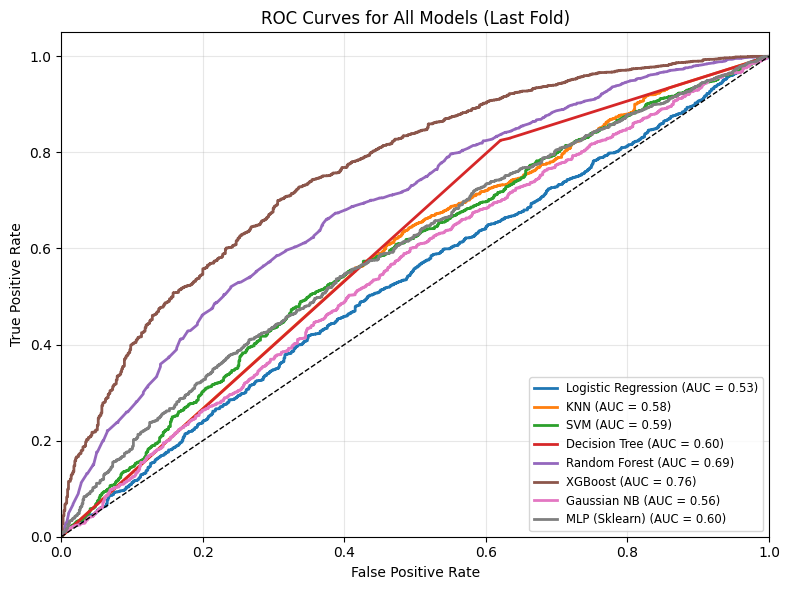

In [60]:


plt.figure(figsize=(8, 6))

for model_name, (y_true, _, y_prob) in last_fold_preds.items():
    if y_prob is None:
        continue

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc_value = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        lw=2,
        label=f"{model_name} (AUC = {roc_auc_value:.2f})"
    )


plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models (Last Fold)')
plt.legend(loc="lower right", fontsize='small')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Here, XGBoost’s curve is at the top-left, so it has the highest AUC (0.76) and provides the most balanced classification ability.